In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# drop unnecessary columns
df = df.drop(columns = ['CLIENTNUM', 
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [4]:
cat_col = [x for x in df.columns if df[x].dtype == 'O'] # 카테고리 데이터 열
num_col = [x for x in df.columns if x not in cat_col] # numeric 데이터 열

print('카테고리형 변수 갯수 : {} \n\
숫자형 변수 갯수 : {}'.format(len(cat_col), len(num_col)))

카테고리형 변수 갯수 : 6 
숫자형 변수 갯수 : 14


Attribution_Flag: 카드 유지자/이탈자

- Numeric Features:
Customer_Age: 나이(26~73) 
Marital_Status:  결혼 여부
Months_on_book: 은행거래기간. (Min13~Max56)
Total_Relationship_Count: 보유한 제품 수
Months_Inactive_12_mon: 12개월 동안 비활성 상태인 달 수 (1~6)
Contacts_Count_12_mon:  12개월간 은행과의 연락 수 (0~6)
Credit_Limit: 신용한도액
Total_Revolving_Bal: 회전잔액(리볼빙)
Avg_Open_To_Buy:  12개월 평균 신용 한도 구매 가능액
Total_Amt_Chng_Q4_Q1:  거래 변동 금액 (Q1/Q4)
Total_Trans_Amt:  총 거래 금액
Total_Trans_Ct: 총 거래 수
Total_Ct_Chng_Q4_Q1: 거래 건수 변동(Q1/Q4)
Avg_Utilization_Ratio: 평균 카드 사용률

- Categorical Features:
Gender:  M=Male, F=Female.성별 0,1로 표현
Education_Level:  최종학력
Marital_Status: 결혼여부
Income_Category: 소득
Card_Category:  카드 종류

In [5]:
# data 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64
Total_Trans_Ct              10127 non-null int

In [6]:
# **앞서 데이터 시각화 과정을 통해 앞서 Unknown 문자열로 채워짐을 확인하는 내용 추가 

def hasUnknown(feature): # 결측치가 포함된 열을 알려줘! 함수
    result = 0
    for x in df[feature].str.contains('Unknown'):
        if x == True: #
            result = 1
    if result == 1:
        print('{} : has string "Unknown"!'.format(feature))

In [7]:
##  Education_Level열의 Unknown 문자열을 NaN으로 바꿔주는 코드
# df.loc[df.Education_Level == 'Unknown', 'Education_Level'] = np.nan

In [8]:
catg_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

for feature in catg_features: # 모든 범주형변수열에 적용
    hasUnknown(feature)
    df.loc[df[feature] == 'Unknown', feature] = np.nan # Unknown문자열 into NaN

Education_Level : has string "Unknown"!
Marital_Status : has string "Unknown"!
Income_Category : has string "Unknown"!


In [9]:
# 결측치 시각화 
import missingno as msno

msno.matrix(df) # 결측치가 나타난 위치 시각화

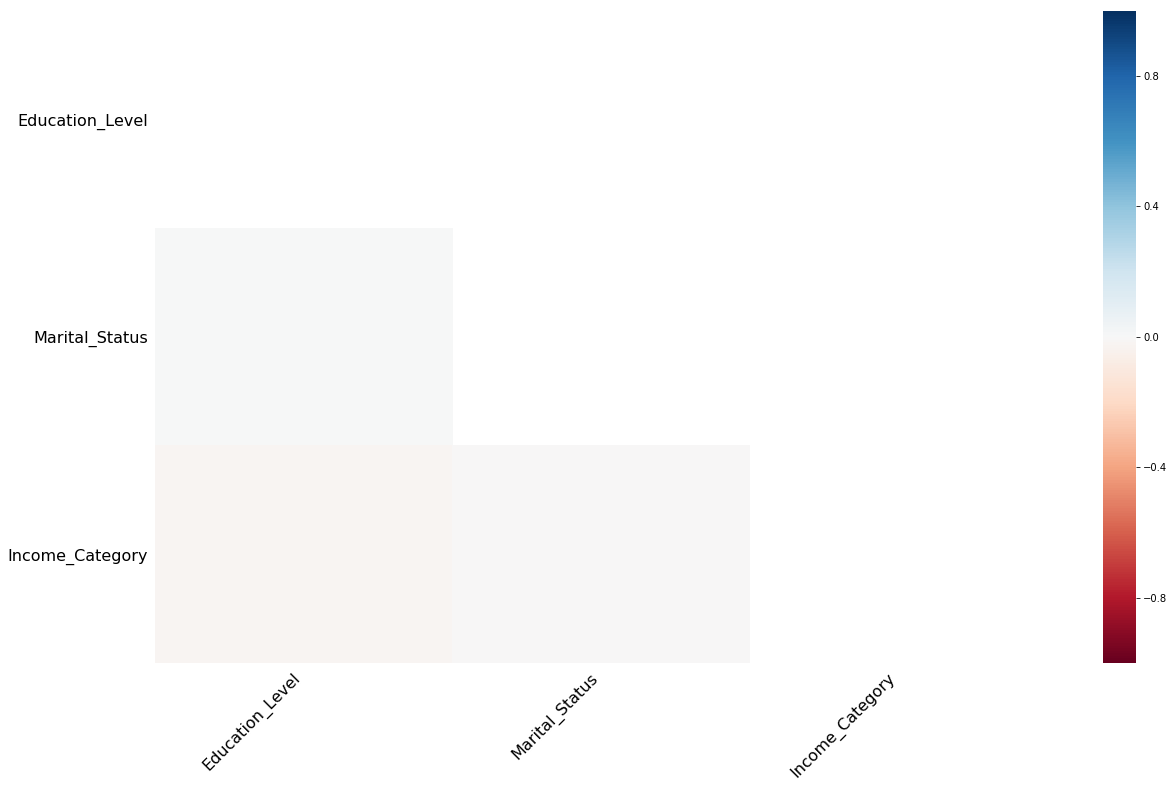

In [10]:
msno.heatmap(df) # 결측치 포함 열과 상관관계를 갖는 df 내 feature 시각화. 

## Feature Engineering

##### from Text -> to Categorical

In [11]:
# 모든 카테고리 데이터 열의 카테고리(ex. Gener열: Male,Female..)를 확인하기 위한 함수 
for cat_feature in catg_features:
    print("✅",cat_feature, ":")
    print(df[cat_feature].value_counts())
    print('----------')

✅ Gender :
F    5358
M    4769
Name: Gender, dtype: int64
----------
✅ Education_Level :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------
✅ Marital_Status :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------
✅ Income_Category :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
----------
✅ Card_Category :
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------


In [12]:
# # 목표) 각 카테고리에 index를 부여할거고, 그 index로 text데이터값을 숫자로 바꿔주겠다

# # step 1) category타입으로 전환
# df['Education_Level'] = df['Education_Level'].astype('category') 

# # step 2) Education의 카테고리(College ... Uneducated)를 꺼내 -> enumerate로 겹치지 않는 인덱스 부여. 
# idx_list_Edu = dict(enumerate(df['Education_Level'].cat.categories)) 
# idx_list_Edu

In [13]:
catg_features # 범주형 변수 포함 Feature

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [14]:
# index 자동 부여 
# (참고) one-hot-encoder을 사용하면 인코딩시 알아서 text->숫자로 변환해주지만...one-hot-encoder는 결측치가 없어야 쓸 수 있어!! 지금은 결측치 처리 전이므로 사용 X. -> text data를 숫자 범주형 데이터로 바꿔줌
index_dicts = {}
for cat_feature in catg_features:
    df[cat_feature] = df[cat_feature].astype('category') # category 타입으로 전환. 아래 cat.categories모듈을 쓰기 위해 선행되어야 할 조건.
    idx_list = dict(enumerate(df[cat_feature].cat.categories)) 
    print(cat_feature, idx_list)
    index_dicts[cat_feature] = idx_list

Gender {0: 'F', 1: 'M'}
Education_Level {0: 'College', 1: 'Doctorate', 2: 'Graduate', 3: 'High School', 4: 'Post-Graduate', 5: 'Uneducated'}
Marital_Status {0: 'Divorced', 1: 'Married', 2: 'Single'}
Income_Category {0: '$120K +', 1: '$40K - $60K', 2: '$60K - $80K', 3: '$80K - $120K', 4: 'Less than $40K'}
Card_Category {0: 'Blue', 1: 'Gold', 2: 'Platinum', 3: 'Silver'}


In [15]:
index_dicts # feature : { 0 : 카데고리1, 1 : 카데고리2, 2 : 카데고리3...   } 구조

{'Gender': {0: 'F', 1: 'M'},
 'Education_Level': {0: 'College',
  1: 'Doctorate',
  2: 'Graduate',
  3: 'High School',
  4: 'Post-Graduate',
  5: 'Uneducated'},
 'Marital_Status': {0: 'Divorced', 1: 'Married', 2: 'Single'},
 'Income_Category': {0: '$120K +',
  1: '$40K - $60K',
  2: '$60K - $80K',
  3: '$80K - $120K',
  4: 'Less than $40K'},
 'Card_Category': {0: 'Blue', 1: 'Gold', 2: 'Platinum', 3: 'Silver'}}

In [16]:
for cat_feature in catg_features:
    for k,v in index_dicts[cat_feature].items(): # 
        # cat_feature이 Education_Level인 경우 : index_dicts['Education_Level'] == {0: 'College',1:'Doctorate',2:'Graduate',3:'High School',4:'Post-Graduate',5:'Uneducated'}
        # 위에서 key, value를 뽑아와 데이터프레임에 key,value값을 바꿔 저장  ex.'Graduate'값을 가진 셀에 2를 넣어준다 
        df[cat_feature].replace(v,k, inplace=True) 

In [17]:
df.head() # text->categorical 변환 완료 

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,1,3,3.0,1.0,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,0,5,2.0,2.0,4.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,1,3,2.0,1.0,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,0,4,3.0,NaN,4.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,1,3,5.0,1.0,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
# y 데이터 변환
df.Attrition_Flag = df.Attrition_Flag.apply(lambda x: 1 if 'Existing' in x else 0)

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3.0,1.0,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2.0,2.0,4.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2.0,1.0,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3.0,NaN,4.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5.0,1.0,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [19]:
# !pip install -U scikit-learn

- 결측치 추가 방법 및 설명 참고 자료: https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

In [20]:
# 방법 1)  KNNImputer로 결측치 추가 
from sklearn.impute import KNNImputer

imputer_KNN = KNNImputer(n_neighbors=30)
df_filled_KNN = imputer_KNN.fit_transform(df)

df_filled_KNN = pd.DataFrame(df_filled_KNN).round(decimals=0)
df_filled_KNN.columns = df.columns
df_filled_KNN.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.0,1144.0,42.0,2.0,0.0
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,2.0,1291.0,33.0,4.0,0.0
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,0.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,3.0,1887.0,20.0,2.0,0.0
3,1.0,40.0,0.0,4.0,3.0,1.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.0,1171.0,20.0,2.0,1.0
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,0.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.0,816.0,28.0,2.0,0.0


In [21]:
# 방법 2) mean/media/most_frequent로 결측치 추가 
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
df_filled_mean = imputer_mean.fit_transform(df)

df_filled_mean = pd.DataFrame(df_filled_KNN)
df_filled_mean.columns = df.columns
df_filled_mean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45.0,1.0,3.0,3.0,1.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.0,1144.0,42.0,2.0,0.0
1,1.0,49.0,0.0,5.0,2.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,2.0,1291.0,33.0,4.0,0.0
2,1.0,51.0,1.0,3.0,2.0,1.0,3.0,0.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,3.0,1887.0,20.0,2.0,0.0
3,1.0,40.0,0.0,4.0,3.0,1.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.0,1171.0,20.0,2.0,1.0
4,1.0,40.0,1.0,3.0,5.0,1.0,2.0,0.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.0,816.0,28.0,2.0,0.0


In [22]:
# !pip install datawig
# !pip install impyute

In [23]:
# # 방법 3) MICE로 결측치 추가 
# from impyute.imputation.cs import mice

# df_filled_mice=mice(df.values)
# df_filled_mice.head()

# # 방법 4) (무슨이유에선지 작동 XX)딥러닝 기반 모델 Datawig로 결측치 추가: 범주형 변수를 예측하는데 특히 좋은 성능을 보임.
# import datawig

# col_idx = list(range(20))
# col_idx_nan = [4,5,6] # 4: Education_Level, 5: Marital_Status, 6: Income_Category
# input_columns = list( set(col_idx)-set(col_idx_nan) )

# imputer_datawig = datawig.SimpleImputer(
#     input_columns=df.columns.difference(['Education_Level']), # impute에 사용할 컬럼을 지정해줄수 있다. 컬럼 '3'은 제외시켰다.
#     output_column= 'Education_Level', # 컬럼 4의 missing value를 채운다.
#     )
# imputer_datawig.fit(train_df=df, num_epochs=50)
# df_null_only = df[df['Education_Level'].isnull()]
# np_imputed = imputer_datawig.predict(df_null_only)
# df_filled_dtw = pd.DataFrame(np_imputed)

# # 변환 후 데이터 확인
# df_filled_dtw.head(10)

### Feature Scaling

In [24]:
# Scaling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import model_selection

x_data = df_filled_KNN[df_filled_KNN.columns.difference(['Attrition_Flag'])] #Attrition_Flag이 아닌 모든 열
y_data = df_filled_KNN['Attrition_Flag']

# **용석님 질문
x_train, x_test, y_train, y_test =\
model_selection.train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# Data scaling
numeric_features = list(x_data.columns.difference(catg_features)) # 범주형데이터가 아닌 모든 열(==숫자데이터)
numeric_transformer = StandardScaler()

categorical_features = catg_features # 범주형데이터열
categorical_transformer = OneHotEncoder(categories='auto') 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])

preprocessor_pipe.fit(x_train)

x_train_scaled = preprocessor_pipe.transform(x_train)
x_test_scaled = preprocessor_pipe.transform(x_test)

pd.DataFrame(x_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.883938,-0.572789,0.486704,0.890410,0.070596,-0.268854,-1.323300,0.503428,0.217538,0.368766,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.436493,-0.572789,1.383209,-0.428935,0.949128,-1.040993,2.625985,1.512241,0.217538,0.368766,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.596675,-0.572789,0.486704,-0.634061,-0.682431,1.275424,-0.335979,-0.379283,0.217538,0.368766,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.341044,-0.572789,-0.409802,-0.277291,0.196101,0.503285,-1.323300,0.377326,0.217538,0.368766,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.166219,-0.572789,-1.306308,-0.161303,0.321605,1.275424,-1.323300,0.629530,0.217538,0.368766,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,1.643015,-0.572789,0.486704,1.662824,-2.062980,-1.813132,0.651342,-2.018605,0.217538,0.368766,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7084,-0.411832,-0.572789,0.486704,-0.468992,0.447110,-0.268854,0.651342,0.881733,0.217538,0.368766,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7085,0.156457,-0.572789,-2.202814,0.225400,1.702155,-1.040993,0.651342,1.764445,0.217538,0.368766,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7086,2.813171,-0.572789,-0.409802,2.846482,0.572614,0.503285,0.651342,0.503428,0.217538,0.368766,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier

#  (**하이퍼파라미터 최적화 필요, Class불균형 해소, 필요)

### Logistic Regression

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf_LR = LogisticRegression(random_state=0)
clf_LR.fit(x_train_scaled, y_train)
clf_LR_pred=clf_LR.predict(x_test_scaled)
print('Accuracy: ', accuracy_score(clf_LR.predict(x_test_scaled), y_test))
# scaled data를 넣으니 성능 향상

print('accuracy: %.4f' % accuracy_score(y_test, clf_LR_pred))
print('precision: %.4f' % precision_score(y_test, clf_LR_pred))
print('recall: %.4f' % recall_score(y_test, clf_LR_pred))
print('F1: %.4f' % f1_score(y_test, clf_LR_pred))

Accuracy:  0.9029285949325436
accuracy: 0.9029
precision: 0.9294
recall: 0.9586
F1: 0.9438


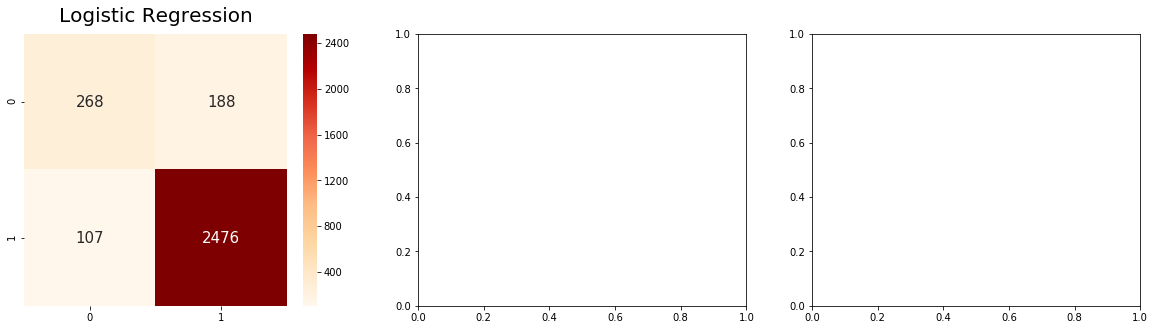

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

confu = confusion_matrix(y_true = y_test, y_pred = clf_LR_pred)

sns.heatmap(confu, annot=True, annot_kws={'size':15},cmap='OrRd',fmt='.10g',ax=ax[0])
ax[0].set_title('Logistic Regression',pad=12,fontsize=20)
plt.show()

### SVM

In [28]:
from sklearn.svm import SVC
clf_SVC = SVC()
clf_SVC.fit(x_train_scaled, y_train)
acc = accuracy_score(y_test, clf_SVC.predict(x_test_scaled))
print("The accuracy score on test set: {:.4f}".format(acc))
# scaled data를 넣으니 성능 향상

The accuracy score on test set: 0.9273


### Random Forest

In [29]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'min_samples_split': 5,
#           'learning_rate': 0.01,
         'random_state':0}

clf_RFC = ensemble.RandomForestClassifier(**params)
clf_RFC.fit(x_train, y_train)
acc = accuracy_score(y_test, clf_RFC.predict(x_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9125


In [1]:
from sklearn.model_selection import GridSearchCV # 최적 하이퍼파라미터 찾기

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf_DTC = DecisionTreeClassifier(random_state=0)
clf_DTC.fit(x_train, y_train)
acc = accuracy_score(y_test, clf_DTC.predict(x_test))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9404


In [32]:
dt_clf = DecisionTreeClassifier(random_state=0)

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [x for x in range(3, 15,2)],
              'min_samples_leaf': [x for x in range(1, 15,2)],
              'max_features': ['auto', 'sqrt', 'log2'],
              'class_weight': ['balanced', None],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5) 



### AdaBoosting

In [33]:
clf_AB = ensemble.AdaBoostClassifier(random_state=0)
clf_AB.fit(x_train_scaled, y_train)
acc = accuracy_score(y_test, clf_AB.predict(x_test_scaled))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9572


### Gradient Boosting

In [34]:
clf_GBC = ensemble.GradientBoostingClassifier(random_state=0)
clf_GBC.fit(x_train_scaled, y_train)
acc = accuracy_score(y_test, clf_GBC.predict(x_test_scaled))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9641


### Light GBM

In [35]:
from lightgbm.sklearn import LGBMClassifier

clf_LGBM = LGBMClassifier(random_state=0)
clf_LGBM.fit(x_train_scaled, y_train)
acc = accuracy_score(y_test, clf_LGBM.predict(x_test_scaled))
print("The accuracy score on test set: {:.4f}".format(acc))

C:\Users\USER\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\USER\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The accuracy score on test set: 0.9681


### KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(3) 
clf_KNN.fit(x_train_scaled,y_train) # KNN 모델 학습
acc = accuracy_score(y_test, clf_KNN.predict(x_test_scaled))
print("The accuracy score on test set: {:.4f}".format(acc))

The accuracy score on test set: 0.9003


In [38]:
# KNN의 최적 N값 찾는 코드... 너무 오래 걸려서 중단 
from sklearn.model_selection import GridSearchCV
parameters_knn = {"n_neighbors": range(1, 10)}
gridsearch = GridSearchCV(clf_KNN, parameters_knn)
gridsearch.fit(x_train_scaled, y_train)
gridsearch.best_params_

KeyboardInterrupt: 